**Program to use pytesseract for OCR reading**
[pytesseract](https://pypi.org/project/pytesseract/) is a wrapper for  Google’s Tesseract-OCR Engine whose documentation is at
[Tesseract-OCR Engine](https://github.com/tesseract-ocr/tesseract)

We will read the text from a picture stored on your hard disk and of a picture taken from your laptop's web camera.

In [7]:
!sudo apt install tesseract-ocr # sudo permits a user to execute a command as a super user
# apt is short for Advance Packing Tool which extracts a package from a library.
!pip install pytesseract
# Our application requires pytesseract which has tesseract-ocr as a dependency

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,370 kB/s)
debconf: unable to initi

In [1]:
import pytesseract
from PIL import Image

IPython display is a module of the IPython library and their respective libraries are at

[ipython.readthedocs.io/en/stable/](https://ipython.readthedocs.io/en/stable/)
and
[IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display)

In particular we wil use the display function whose usage is:

local_file = FileLink("my/data.txt")

display(local_file)

The documentation for the Javascript class is at [Javascript](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Javascript)
it takes a string as input and creates a javascript object.

[Base64](https://docs.python.org/3/library/base64.html)
provides functions for encoding binary data to printable ASCII characters and decoding such encodings back to binary data. It provides encoding and decoding functions for the encodings specified in RFC 4648, which defines the Base16, Base32, and Base64 algorithms, and for the de-facto standard Ascii85 and Base85 encodings.

Link to eval_js  [documentation](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=MprPsZJa3AQF).



The code in the next block is inspired by
[Web Camera Javascript](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq&line=1&uniqifier=1).


In [2]:
from IPython.display import display, Javascript
 
from google.colab.output import eval_js
from base64 import b64decode

def clickPic(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function clickPicJS(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Press to Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('clickPicJS({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


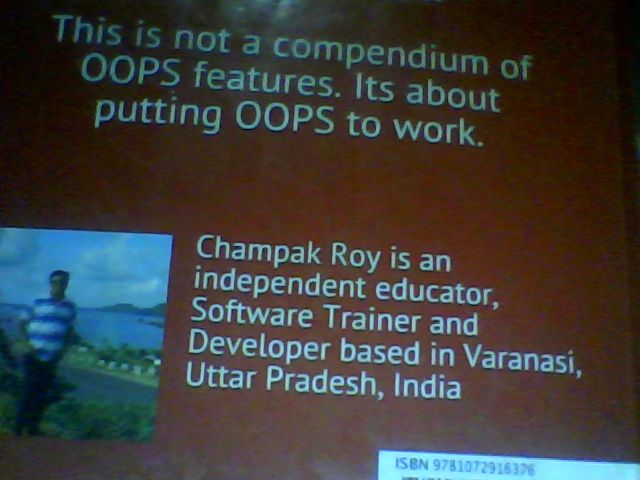

In [10]:
from IPython.display import Image as img
try:
  filename = clickPic()
  print('Saved to {}'.format(filename))
  imgpath=filename
  # Show the image which was just taken.
  display(img(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [15]:
from google.colab import files
uploaded = files.upload()
print(uploaded)
keys=list(uploaded.keys())
print(keys[0])
imgpath=keys[0]

Saving 71wZJ9-0JmL.jpg to 71wZJ9-0JmL.jpg
{'71wZJ9-0JmL.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0b\x08\x08\x08\x08\x08\x0b\x08\x08\x0b\x10\x0b\t\x0b\x10\x13\x0e\x0b\x0b\x0e\x13\x16\x12\x12\x13\x12\x12\x16\x15\x11\x13\x12\x12\x13\x11\x15\x15\x19\x1a\x1b\x1a\x19\x15!!$$!!0///06666666666\xff\xdb\x00C\x01\x0c\x0b\x0b\x0c\r\x0c\x0f\r\r\x0f\x13\x0e\x0e\x0e\x13\x14\x0e\x0f\x0f\x0e\x14\x1a\x12\x12\x14\x12\x12\x1a"\x18\x15\x15\x15\x15\x18"\x1e \x1b\x1b\x1b \x1e%%""%%//,//6666666666\xff\xc0\x00\x11\x08\x05P\x03\x8b\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86

In [16]:

print(imgpath)
readtext = pytesseract.image_to_string(Image.open(imgpath))
print(readtext)
pdf = pytesseract.image_to_pdf_or_hocr(imgpath, extension='pdf')
with open('extracteddata.pdf', 'w+b') as f:
    f.write(pdf) # pdf type is bytes by default


71wZJ9-0JmL.jpg
This book is about putting
Object Oriented
Ee Koel.
Like a carpenter breaking
down a piece of furniture into
small parts, then into smaller
parts and then fabricating
those parts and finally
completing the furniture by
connecting everything into
the correct place.

This is not a compendium of
OOPS features. Its about
putting OOPS to work.

Champak Roy is an
independent educator,
Software Trainer and

_ Developer based in Varanasi,
s# Uttar Pradesh, India

 

